<a href="https://colab.research.google.com/github/lilfetz22/Health_Scores_CAP2/blob/master/scripts/Health_Scores_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns
import warnings
import io
from random import seed, randint,sample
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering,AffinityPropagation
from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files


In [4]:
uploaded = files.upload()

Saving city_data_scaled.csv to city_data_scaled (3).csv
Saving tract_data_scaled.csv to tract_data_scaled (3).csv


In [0]:
city_data_scaled = pd.read_csv(io.BytesIO(uploaded['city_data_scaled.csv']))
tract_data_scaled = pd.read_csv(io.BytesIO(uploaded['tract_data_scaled.csv']))
city_data_scaled = city_data_scaled.set_index('stpl_fips')
tract_data_scaled = tract_data_scaled.set_index('stcotr_fips')

## Clustering

### KMeans

100%|██████████| 9/9 [00:01<00:00,  7.67it/s]


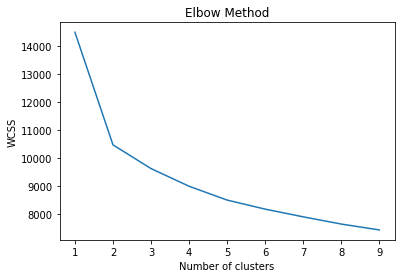

In [5]:
wcss = []
for i in tqdm(range(1, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(city_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

5 clusters

In [6]:
kmeans2 = KMeans(n_clusters=5, init='k-means++')
kmeans2.fit(city_data_scaled)
pred = kmeans2.predict(city_data_scaled)
frame=city_data_scaled.copy()
frame['cluster'] = pred
frame['cluster'].value_counts()

0    113
4     99
2     82
1     76
3     71
Name: cluster, dtype: int64

In [0]:
frame_small = frame.loc[:, ['cluster','Absenteeism','Air pollution - particulate matter','Binge drinking',
                            'Breast cancer deaths']]
cancer = frame.loc[:, ['cluster','Breast cancer deaths','Cardiovascular disease deaths',
                       'Colorectal cancer deaths','Diabetes']]

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


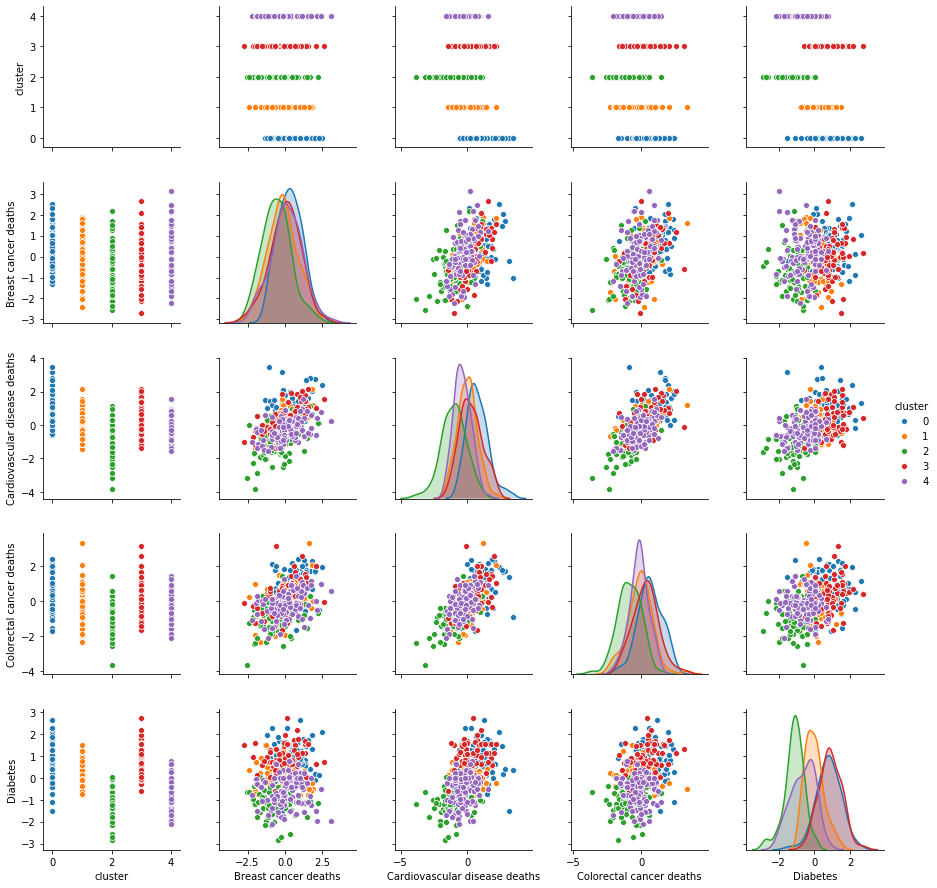

In [8]:
sns.pairplot(cancer, hue='cluster')

100%|██████████| 9/9 [00:13<00:00,  1.98s/it]


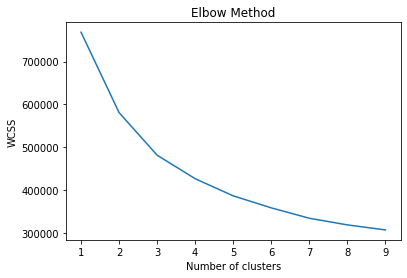

In [9]:
wcss2 = []
for i in tqdm(range(1, 10)):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(tract_data_scaled)
    wcss2.append(kmeans2.inertia_)
plt.plot(range(1,10), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans3 = KMeans(n_clusters=5, init='k-means++')
kmeans3.fit(tract_data_scaled)
pred2 = kmeans3.predict(tract_data_scaled)
frame2=tract_data_scaled.copy()
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

3    9286
1    5992
0    5102
4    3635
2    2833
Name: cluster, dtype: int64

### DBSCAN

In [0]:
city_arr = np.array(city_data_scaled)

In [0]:
dbsc = DBSCAN(eps=.5, min_samples=30)
labels = dbsc.fit_predict(city_arr)

### Hierarchical Clustering

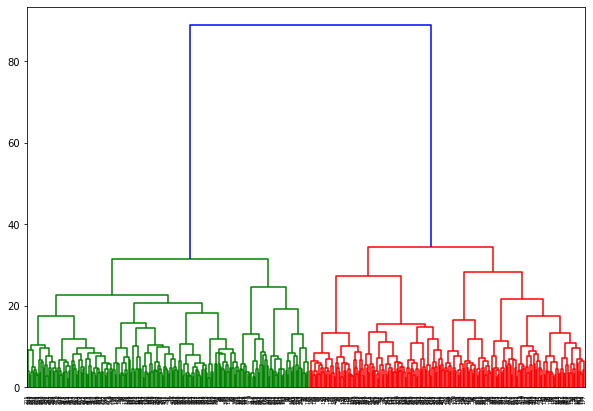

In [12]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(city_data_scaled, method='ward'))

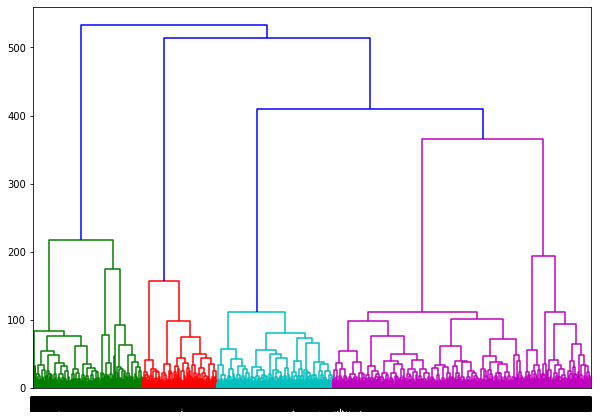

In [14]:
plt.figure(figsize=(10,7))
dend2 = shc.dendrogram(shc.linkage(tract_data_scaled, method='ward'))

In [0]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean',linkage='ward')
agg_pred = cluster.fit_predict(city_data_scaled)
cds_copy = city_data_scaled.copy()
cds_copy['agg_predicted'] = agg_pred

In [0]:
cluster_t = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
agg_pred_t = cluster_t.fit_predict(tract_data_scaled)
tds_copy = tract_data_scaled.copy()
tds_copy['agg_predicted'] = agg_pred_t

In [0]:
sequence = list(range(0,42))

In [16]:
rand_cols = sample(sequence, 4)
rand_cols.append(42)
rand_cols

[37, 38, 25, 29, 42]

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


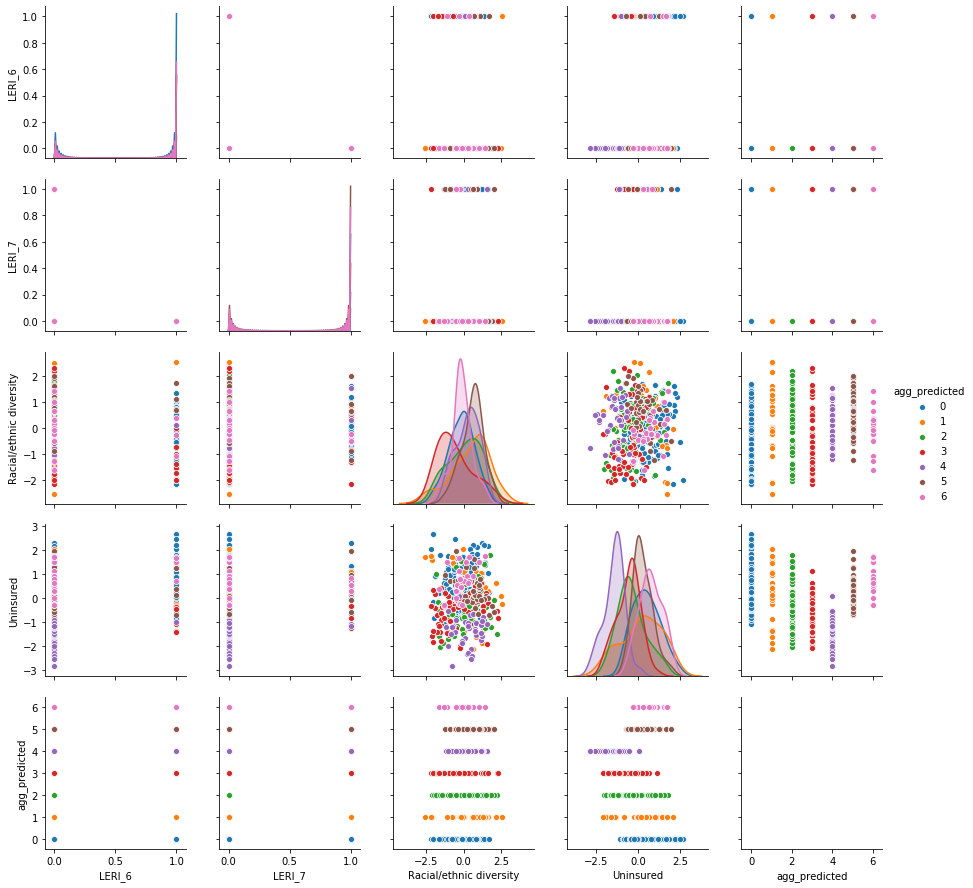

In [17]:
sns.pairplot(cds_copy.iloc[:, rand_cols], hue='agg_predicted')

### AffinityPropagation

In [0]:
affprop = AffinityPropagation()
affpred = affprop.fit_predict(city_data_scaled)
cds_aff = city_data_scaled.copy()
cds_aff['aff_pred']=affpred

In [0]:
affprop = AffinityPropagation()
tds_aff = tract_data_scaled.copy()

In [0]:
affpred_t = affprop.fit_predict(tract_data_scaled)


In [0]:
tds_aff['aff_pred']=affpred_t

In [0]:
zto3 = list(range(0,4))
fourto7 = list(range(4,8))
eightto11 = list(range(8,12))
twelveto15 = list(range(12,16))
sixteento19 = list(range(16,20))
twentyto23 = list(range(20,24))
zto3.append(42)

In [0]:
sns.pairplot(cds_aff.iloc[:, zto3],hue='aff_pred')

# Classification

#### Logistic Regression

In [0]:
# scoring classification models
def cv_score(clf, x, y, score_func=accuracy_score):
    result=0
    nfold=5
    for train, test in KFold(nfold).split(x):
        clf.fit(x[train],y[train])
        result += score_func(clf.predict(x[test]), y[test])
    return result/nfold #average

In [0]:
# using kmeans clustering
warnings.filterwarnings('ignore')
def logreg_fx(data, data_cluster)
  X_tr, X_test, y_tr,y_test = train_test_split(data.values, data_cluster.values,
                                                      random_state=5)
  c_space = np.logspace(0.001, 0.1, 1, 10, 100)
  logreg = LogisticRegression()
  param_grid = {'C': c_space}
  logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
  logreg_cv.fit(X_tr, y_tr)

  print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
  print("Best score is {}".format(logreg_cv.best_score_))
  logreg_best = LogisticRegression(C=logreg_cv.best_params_['C'])
  score = cv_score(logreg_best, X_tr, y_tr)
  return score

In [0]:
city_score = logreg_fx(city_data_scaled, frame['cluster'])
print(city_score)
logreg_fx(tract_data_scaled, frame2['cluster'])

In [0]:
city_score2 = logreg_fx(city_data_scaled, cds_copy['agg_predicted'])
print(city_score2)
logreg_fx(tract_data_scaled, tds_copy['agg_predicted'])

In [0]:
city_score3 = logreg_fx(city_data_scaled, cds_aff['aff_pred'])
print(city_score3)
logreg_fx(tract_data_scaled, tds_aff['aff_pred'])